# **Burn Severity Map of Tenerife wildfire, Aug 2023**

<hr>

## About

<img src='../img/20210809_EviaWildfire.jpg' alt='Copernicus Sentinel-2' align='right' width='100%'></img>

<i>Source: https://www.copernicus.eu/en/media/image-day-gallery/evia-wildfire-greece</i>

### Notebook outline
- [1 - Load and browse the Sentinel-2 MSI data](#s2_load_21)
- [2 - Create natural colour composites](#s2_natural_21)
- [3 - Create false colour composites](#s2_false_21)
- [4 - Calculate the Normalized Burn Ratio (NBR) and Differenced NBR images](#s2_nbr_21)
- [5 - Create the burn severity map](#s2_burnseverity_21)

In [7]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install rasterio
#!pip install scikit-image
#!pip install sentinelsat
#!pip install geopandas

#### Load required libraries

In [8]:
#Python libraries

import os
import numpy as np
import pandas as pd
import glob as glob

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib.cm import get_cmap
from matplotlib.axes import Axes
from skimage import exposure
import rasterio
from rasterio import plot
from rasterio.plot import show

from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
warnings.simplefilter(action = "ignore", category = UserWarning)

<hr>

## <a id='s2_load_21'></a>1. Download the Sentinel-2 MSI data

In [9]:
#api = SentinelAPI('USER', 'PASS', 'https://scihub.copernicus.eu/dhus',show_progressbars=True)

In [10]:
## Search by polygon, time, and SciHub query keywords
#footprint = geojson_to_wkt(read_geojson('./TenerifeWildfire.geojson'))
#products = api.query(footprint,
#                     date=("20230814","20230825"),
#                     platformname='Sentinel-2',
#                     producttype= 'S2MSI2A')
#                     #cloudcoverpercentage=(0, 50))

In [11]:
## download all results from the search
#api.download_all(products)
#
## convert to Pandas DataFrame
#products_df = api.to_dataframe(products)
#
## GeoJSON FeatureCollection containing footprints and metadata of the scenes
#api.to_geojson(products)
#
## GeoPandas GeoDataFrame with the metadata of the scenes and the footprints as geometries
#api.to_geodataframe(products)
#
## Get basic information about the product: its title, file size, MD5 sum, date, footprint and
## its download url
##api.get_product_odata(<product_id>)
#
## Get the product's full metadata available on the server
##api.get_product_odata(<product_id>, full=True)

In [12]:
#products_df = api.to_dataframe(products)
#products_df.head()

## <a id='s2_natural_21'></a>2. Create natural colour composites

### Natural colour composite from 13 August 2023

In [13]:
os.listdir('./SENTINEL_Images/PreFire_Images')

['T28RCS_20230813T115229_B02_10m.jp2',
 'T28RCS_20230813T115229_B03_10m.jp2',
 '2023-08-13_S2_RGB.tif',
 'T28RCS_20230813T115229_B04_10m.jp2',
 '2023-08-13_S2_RGB.tif.aux.xml']

In [14]:
aug_r10 = './SENTINEL_Images/PreFire_Images/'

band2=rasterio.open(aug_r10 + 'T28RCS_20230813T115229_B02_10m.jp2')
band3=rasterio.open(aug_r10 + 'T28RCS_20230813T115229_B03_10m.jp2')
band4=rasterio.open(aug_r10 + 'T28RCS_20230813T115229_B04_10m.jp2')

In [15]:
meta = band2.meta
meta.update({"count": 3})

In [16]:
prefire_rgb_path = './SENTINEL_Images/PreFire_Images/2023-08-13_S2_RGB.tif'

with rasterio.open(prefire_rgb_path, 'w', **meta) as dest:
    dest.write(band2.read(1),1)
    dest.write(band3.read(1),2)
    dest.write(band4.read(1),3)

In [17]:
img = rasterio.open(prefire_rgb_path)

In [18]:
image = np.array([img.read(3), img.read(2), img.read(1)])
image.shape

(3, 10980, 10980)

In [19]:
image = image.transpose(1,2,0)

In [20]:
p2, p98 = np.percentile(image, (2,98))
image = exposure.rescale_intensity(image, in_range=(p2, p98)) / 100000

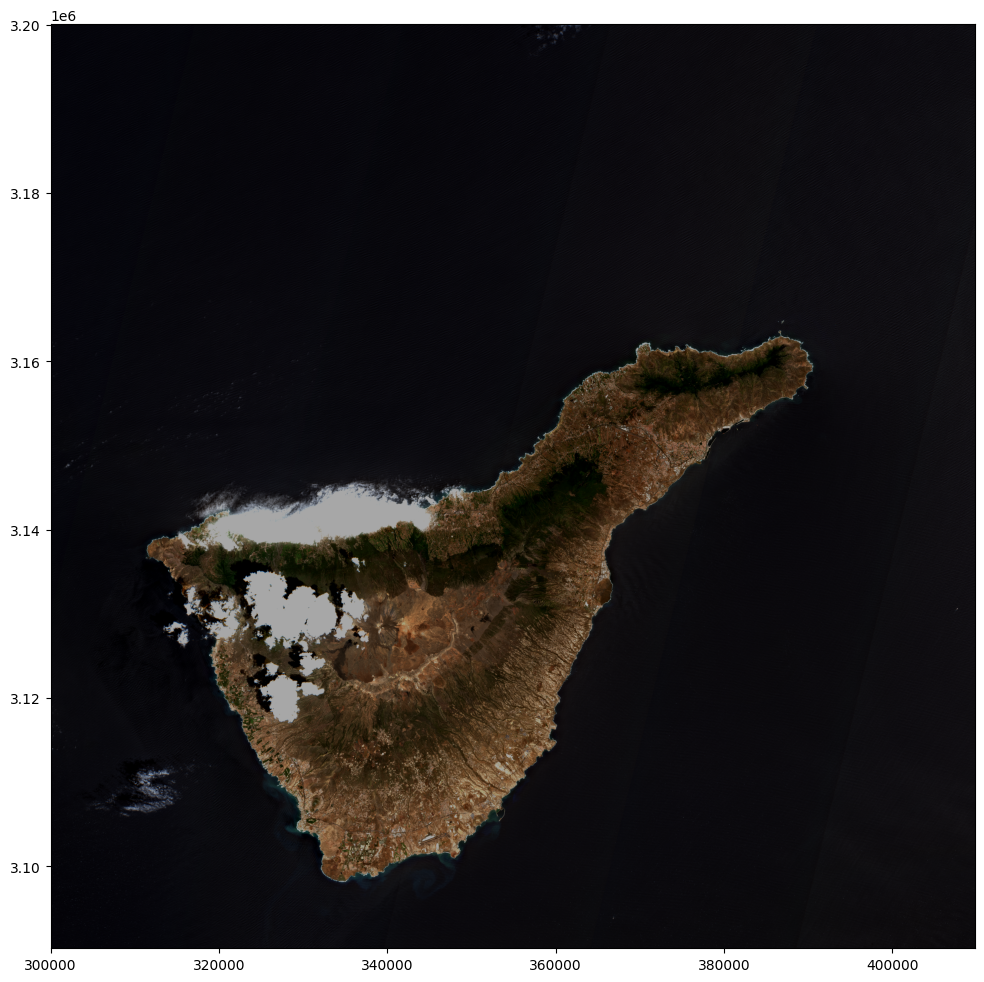

In [21]:
# Define a plot 2,98
fig = plt.figure(figsize=(20,12))

# Show the figure
show(image.transpose(2,0,1), transform=img.transform);

### Natural colour composite from 23 August 2023

In [24]:
os.listdir('./SENTINEL_Images/PostFire_Images')

['T28RCS_20230823T115219_B04_10m.jp2',
 '2023-08-23_S2_RGB.tif.aux.xml',
 'T28RCS_20230823T115219_B02_10m.jp2',
 'T28RCS_20230823T115219_B03_10m.jp2',
 '2023-08-23_S2_RGB.tif']

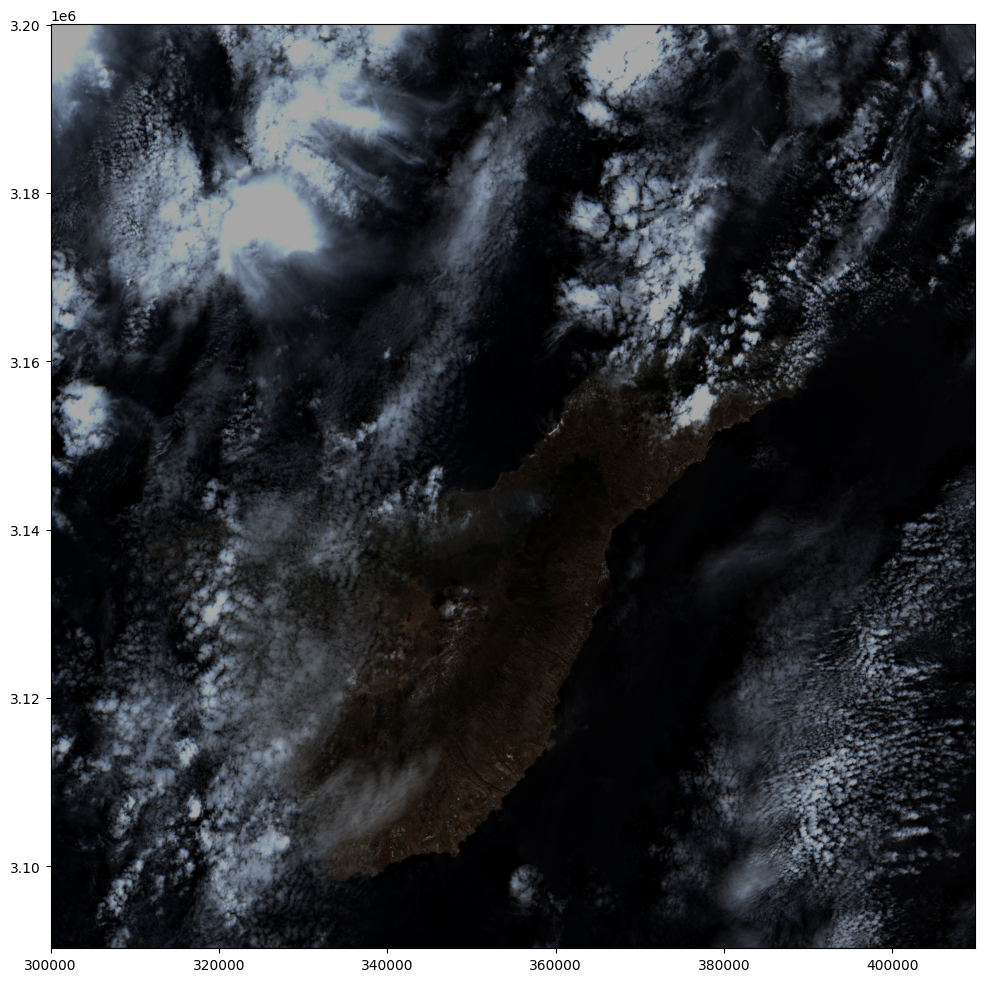

In [26]:
#Define the folder path where the images are stored
sept_r10 = './SENTINEL_Images/PostFire_Images/'

# Open b2, b3 and b4
band2=rasterio.open(sept_r10 + 'T28RCS_20230823T115219_B02_10m.jp2')
band3=rasterio.open(sept_r10 + 'T28RCS_20230823T115219_B03_10m.jp2')
band4=rasterio.open(sept_r10 + 'T28RCS_20230823T115219_B04_10m.jp2')

# Extract and update the metadata
meta = band2.meta
meta.update({"count": 3})

# Write the natural colour composite image with metadata
postfire_rgb_path = './SENTINEL_Images/PostFire_Images/2023-08-23_S2_RGB.tif'

with rasterio.open(postfire_rgb_path, 'w', **meta) as dest:
    dest.write(band2.read(1),1)
    dest.write(band3.read(1),2)
    dest.write(band4.read(1),3)

# Transpose and rescale the image 
img = rasterio.open(postfire_rgb_path)
image = np.array([img.read(3), img.read(2), img.read(1)]).transpose(1,2,0)
p2, p98 = np.percentile(image, (3,97))
image = exposure.rescale_intensity(image, in_range=(p2, p98)) / 100000

# Plot the resulting image
fig = plt.figure(figsize=(20,12))
show(image.transpose(2,0,1), transform=img.transform);

## <a id='s2_false_21'></a>3. Create false colour composites

### False colour composite from 13 August 2023

In [28]:
os.listdir('./SENTINEL_Images/PreFire_Images')

['T28RCS_20230813T115229_B02_10m.jp2',
 'T28RCS_20230813T115229_B03_10m.jp2',
 'T28RCS_20230813T115229_B02_20m.jp2',
 'T28RCS_20230813T115229_B12_20m.jp2',
 '2023-08-13_S2_RGB.tif',
 'T28RCS_20230813T115229_B04_10m.jp2',
 '2023-08-13_S2_RGB.tif.aux.xml',
 'T28RCS_20230813T115229_B8A_20m.jp2']

In [29]:
aug_r20 = './SENTINEL_Images/PreFire_Images/'

band12=rasterio.open(aug_r20 + 'T28RCS_20230813T115229_B12_20m.jp2')
band8a=rasterio.open(aug_r20 + 'T28RCS_20230813T115229_B8A_20m.jp2')
band2=rasterio.open(aug_r20 + 'T28RCS_20230813T115229_B02_20m.jp2')

In [30]:
meta = band2.meta
meta.update({"count": 3})

In [31]:

prefire_false_rgb_path = './SENTINEL_Images/PreFire_Images/2023-08-13_S2_burnscar_RGB.tif'

with rasterio.open(prefire_false_rgb_path, 'w', **meta) as dest:
    dest.write(band2.read(1),1)
    dest.write(band8a.read(1),2)
    dest.write(band12.read(1),3)

In [32]:
img = rasterio.open(prefire_false_rgb_path)

In [33]:
image = np.array([img.read(3), img.read(2), img.read(1)])
image.shape

(3, 5490, 5490)

In [34]:
image = image.transpose(1,2,0)

In [35]:
p2, p98 = np.percentile(image, (2,98))
image = exposure.rescale_intensity(image, in_range=(p2, p98)) / 100000

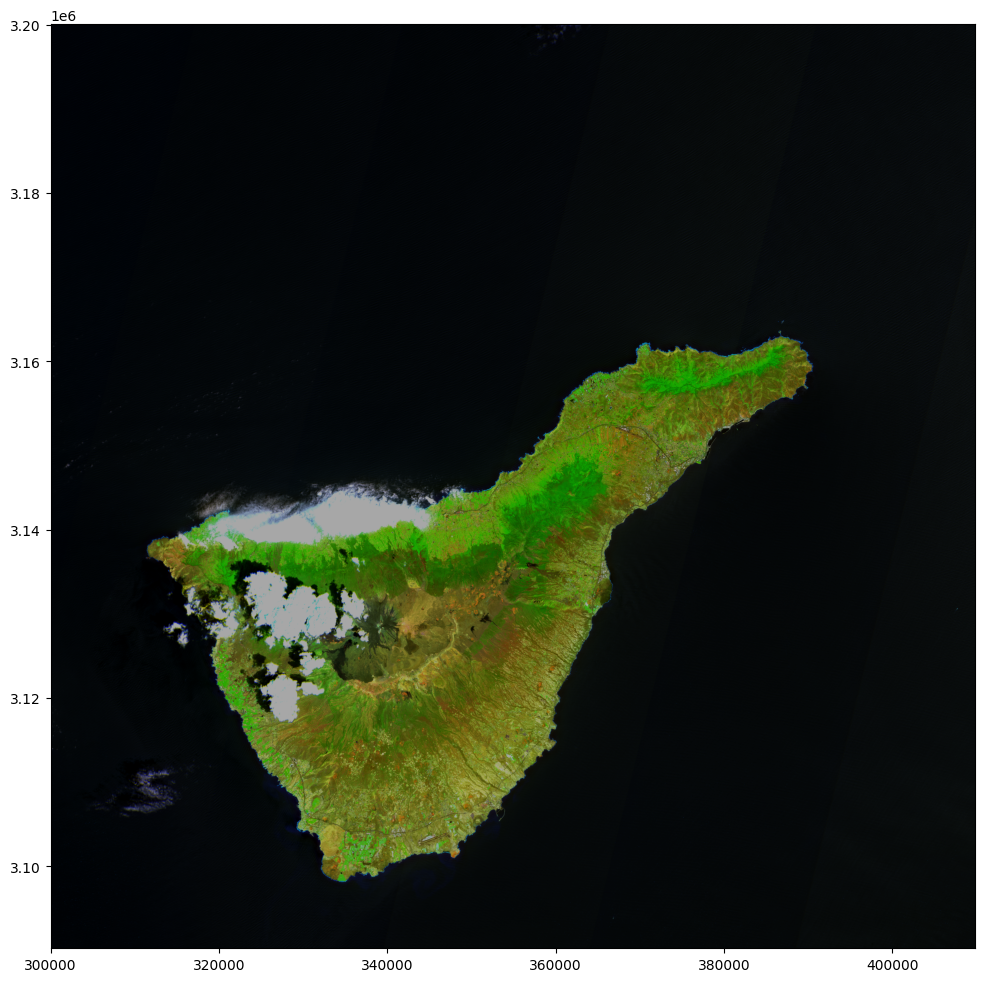

In [36]:
# Define a plot
fig = plt.figure(figsize=(20,12))

# Show the figure
show(image.transpose(2,0,1), transform=img.transform);

### False colour composite from 18 August 2023

In [37]:
os.listdir('./SENTINEL_Images/PostFire_Images')

['2023-08-13_S2_burnscar_RGB.tif.aux.xml',
 'T28RCS_20230823T115219_B8A_20m.jp2',
 'T28RCS_20230823T115219_B04_10m.jp2',
 'T28RCS_20230823T115219_B12_20m.jp2',
 'T28RCS_20230823T115219_B02_20m.jp2',
 '2023-08-13_S2_burnscar_RGB.tif',
 '2023-08-23_S2_RGB.tif.aux.xml',
 'T28RCS_20230823T115219_B02_10m.jp2',
 'T28RCS_20230823T115219_B03_10m.jp2',
 '2023-08-23_S2_RGB.tif']

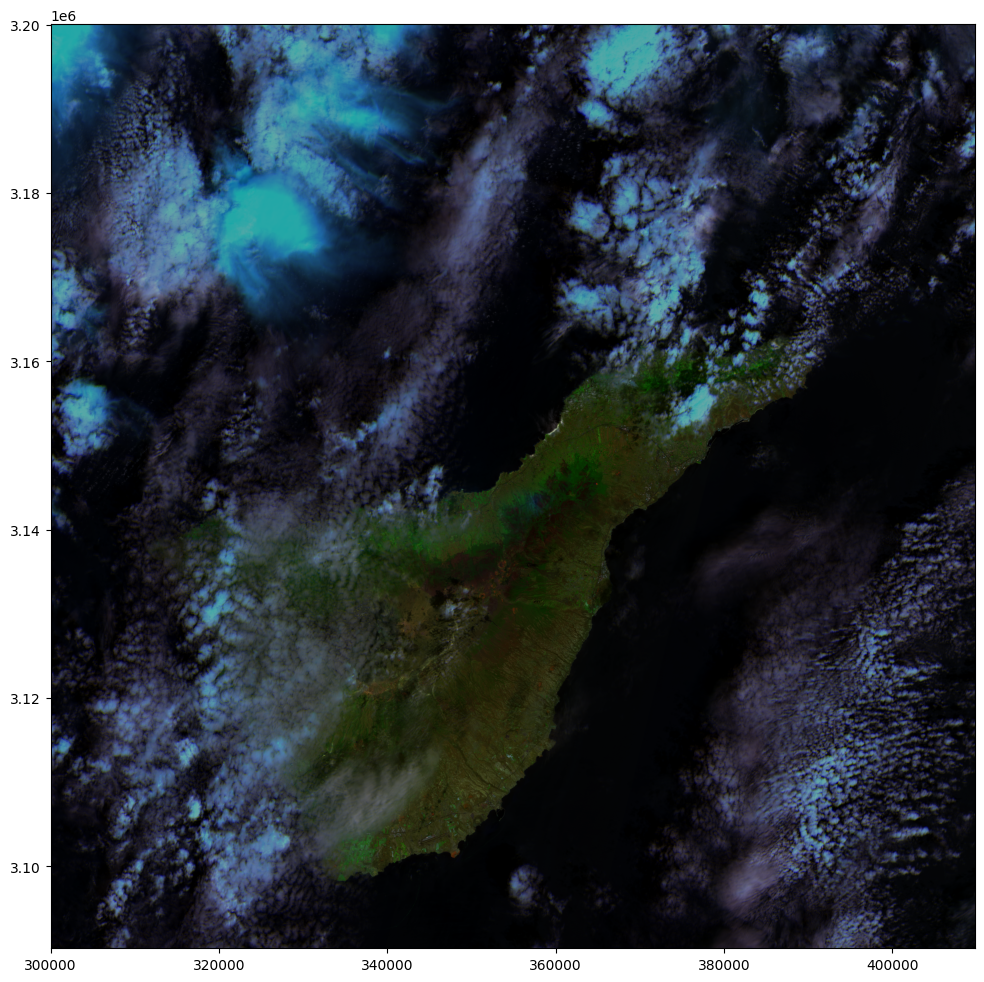

<Axes: >

In [38]:
#Define the folder path where the images are stored
sept_r20 = './SENTINEL_Images/PostFire_Images/'

# Open b2, b8a and b12
band12=rasterio.open(sept_r20 + 'T28RCS_20230823T115219_B12_20m.jp2')
band8a=rasterio.open(sept_r20 + 'T28RCS_20230823T115219_B8A_20m.jp2')
band2=rasterio.open(sept_r20 + 'T28RCS_20230823T115219_B02_20m.jp2')

# Extract and update the metadata
meta = band2.meta
meta.update({"count": 3})

# Write the false colour composite image with metadata
postfire_false_rgb_path = './SENTINEL_Images/PostFire_Images/2023-08-23_S2_burnscar_RGB.tif'

with rasterio.open(postfire_false_rgb_path, 'w', **meta) as dest:
    dest.write(band2.read(1),1)
    dest.write(band8a.read(1),2)
    dest.write(band12.read(1),3)

# Transpose and rescale the image 
img = rasterio.open(postfire_false_rgb_path)
image = np.array([img.read(3), img.read(2), img.read(1)]).transpose(1,2,0)
p2, p98 = np.percentile(image, (2,98))
image = exposure.rescale_intensity(image, in_range=(p2, p98)) / 100000

# Plot the resulting image
fig = plt.figure(figsize=(20,12))
show(image.transpose(2,0,1), transform=img.transform);

## <a id='s2_nbr_21'></a>4. Calculate the Normalized Burn Ratio (NBR) and Differenced NBR images

As explained by [UN SPIDER](https://un-spider.org/advisory-support/recommended-practices/recommended-practice-burn-severity/burn-severity-earth-engine), the Normalized Burn Ratio “uses near-infrared (NIR) and shortwave-infrared (SWIR) wavelengths. Healthy vegetation before the fire has very high NIR reflectance and a low SWIR response. In contrast, recently burned areas have a low reflectance in the NIR and high reflectance in the SWIR band.” The formula is `NBR = (NIR - SWIR) / (NIR + SWIR)` or using the MSI band numbers: `NBR = (B8A - B12) / (B8A + B12)`. 

### NBR on 13 August 2023 (pre-fire)

In [39]:
os.listdir('./SENTINEL_Images/PreFire_Images')

['T28RCS_20230813T115229_B02_10m.jp2',
 'T28RCS_20230813T115229_B03_10m.jp2',
 '2023-08-13_S2_burnscar_RGB.tif.aux.xml',
 'T28RCS_20230813T115229_B02_20m.jp2',
 'T28RCS_20230813T115229_B12_20m.jp2',
 '2023-08-13_S2_RGB.tif',
 'T28RCS_20230813T115229_B04_10m.jp2',
 '2023-08-13_S2_burnscar_RGB.tif',
 '2023-08-13_S2_RGB.tif.aux.xml',
 'T28RCS_20230813T115229_B8A_20m.jp2']

In [41]:
b8a=rasterio.open(aug_r20 + 'T28RCS_20230813T115229_B8A_20m.jp2')
b12=rasterio.open(aug_r20 + 'T28RCS_20230813T115229_B12_20m.jp2')

In [42]:
swir = b12.read()
nir = b8a.read()

In [43]:
nbr = (nir.astype(float)-swir.astype(float))/(nir+swir)

In [44]:
meta = b12.meta
meta.update(driver='GTiff')
meta.update(dtype=rasterio.float32)

In [45]:
prefire_nbr_path = './SENTINEL_Images/PreFire_Images/2021-08-01_S2_NBR.tif'

with rasterio.open(prefire_nbr_path, 'w', **meta) as dest:
    dest.write(nbr.astype(rasterio.float32))

In [46]:
img = rasterio.open(prefire_nbr_path)
img_r = img.read()
image = np.asarray(img_r)

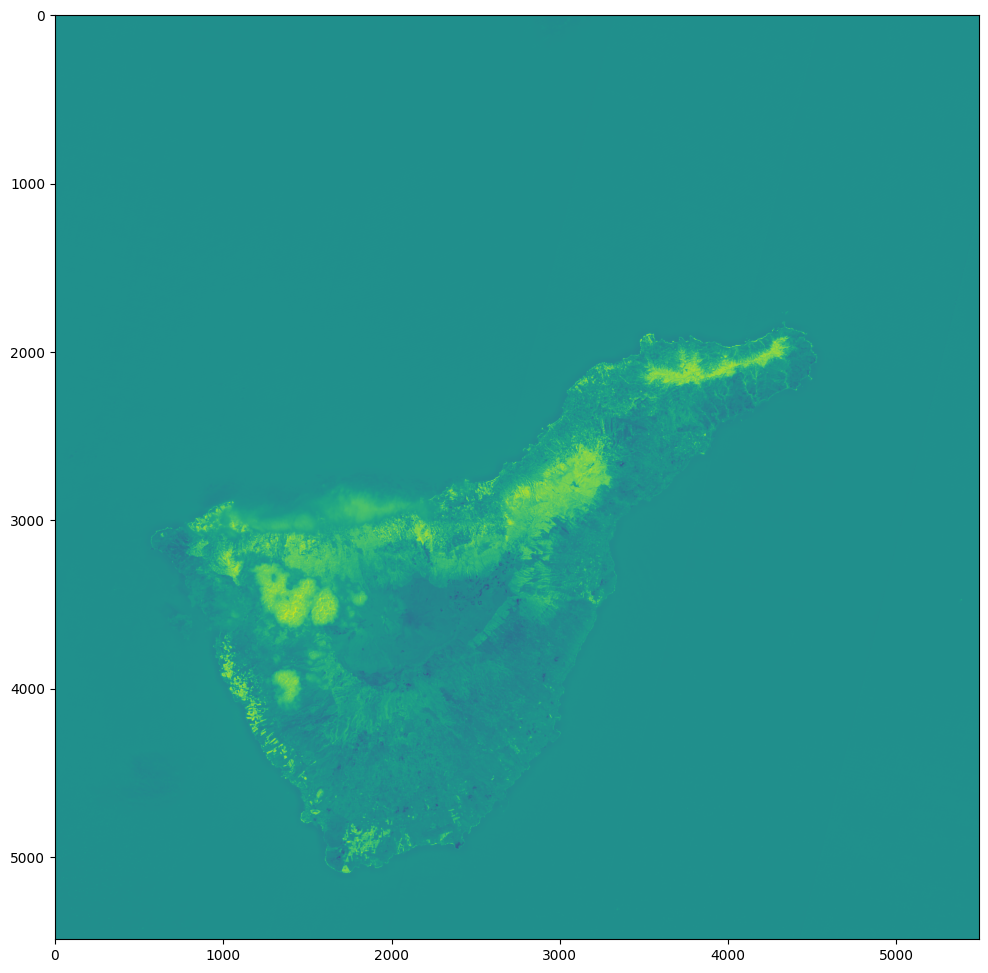

In [47]:
# Define a plot
fig = plt.figure(figsize=(20,12))

# Show the figure
show(image);

### NBR on 18 August 2023 (post-fire)

In [49]:
os.listdir('./SENTINEL_Images/PostFire_Images')

['2023-08-23_S2_burnscar_RGB.tif',
 'T28RCS_20230823T115219_B8A_20m.jp2',
 'T28RCS_20230823T115219_B04_10m.jp2',
 '2023-08-23_S2_burnscar_RGB.tif.aux.xml',
 'T28RCS_20230823T115219_B12_20m.jp2',
 'T28RCS_20230823T115219_B02_20m.jp2',
 '2023-08-23_S2_RGB.tif.aux.xml',
 'T28RCS_20230823T115219_B02_10m.jp2',
 'T28RCS_20230823T115219_B03_10m.jp2',
 '2023-08-23_S2_RGB.tif']

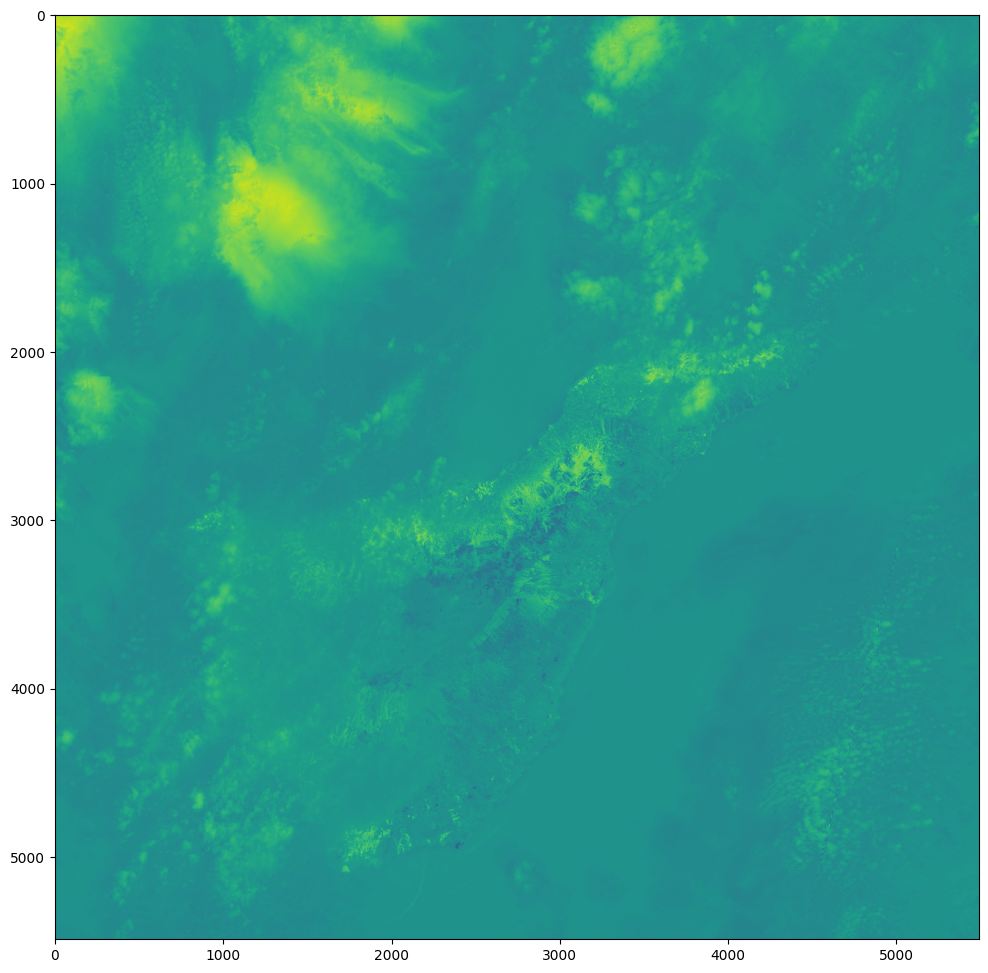

<Axes: >

In [50]:
# Open b8a and b12
b8a=rasterio.open(sept_r20 + 'T28RCS_20230823T115219_B8A_20m.jp2')
b12=rasterio.open(sept_r20 +'T28RCS_20230823T115219_B12_20m.jp2')

# read NIR(b8a) and SWIR(b12) as arrays
swir = b12.read()
nir = b8a.read()

# Calculate NBR
nbr = (nir.astype(float)-swir.astype(float))/(nir+swir)

# Extract and update the metadata
meta = b12.meta
meta.update(driver='GTiff')
meta.update(dtype=rasterio.float32)

# Write the NBR image with metadata
postfire_nbr_path = './SENTINEL_Images/PostFire_Images/2021-08-23_S2_NBR.tif'

with rasterio.open(postfire_nbr_path, 'w', **meta) as dest:
    dest.write(nbr.astype(rasterio.float32))
    
# Open and read the image
img = rasterio.open(postfire_nbr_path)
img_r = img.read()
image = np.asarray(img_r)

# Plot the resulting image
fig = plt.figure(figsize=(20,12))
show(image);

### Differenced NBR (pre-fire minus post-fire NBR)

In [51]:
# Open NBR images from 13 August 2023 (pre-fire) and 23 August 2023 (post-fire)
pre_nbr = rasterio.open(prefire_nbr_path)
post_nbr = rasterio.open(postfire_nbr_path)

# Read the images in as arrays
pre = pre_nbr.read()
post = post_nbr.read()

In [52]:
dnbr = pre.astype(rasterio.float32)-post.astype(rasterio.float32)

In [53]:
meta = pre_nbr.meta
meta.update(driver='GTiff')
meta.update(dtype=rasterio.float32)

In [54]:
dnbr_path = './SENTINEL_Images/2023-08-13_sub_2023-08-23_S2_dNBR.tif'

with rasterio.open(dnbr_path, 'w', **meta) as dest:
    dest.write(dnbr.astype(rasterio.float32))

In [55]:
# Rescale the image
img = rasterio.open(dnbr_path)
img_r = img.read()
image = np.asarray(img_r)

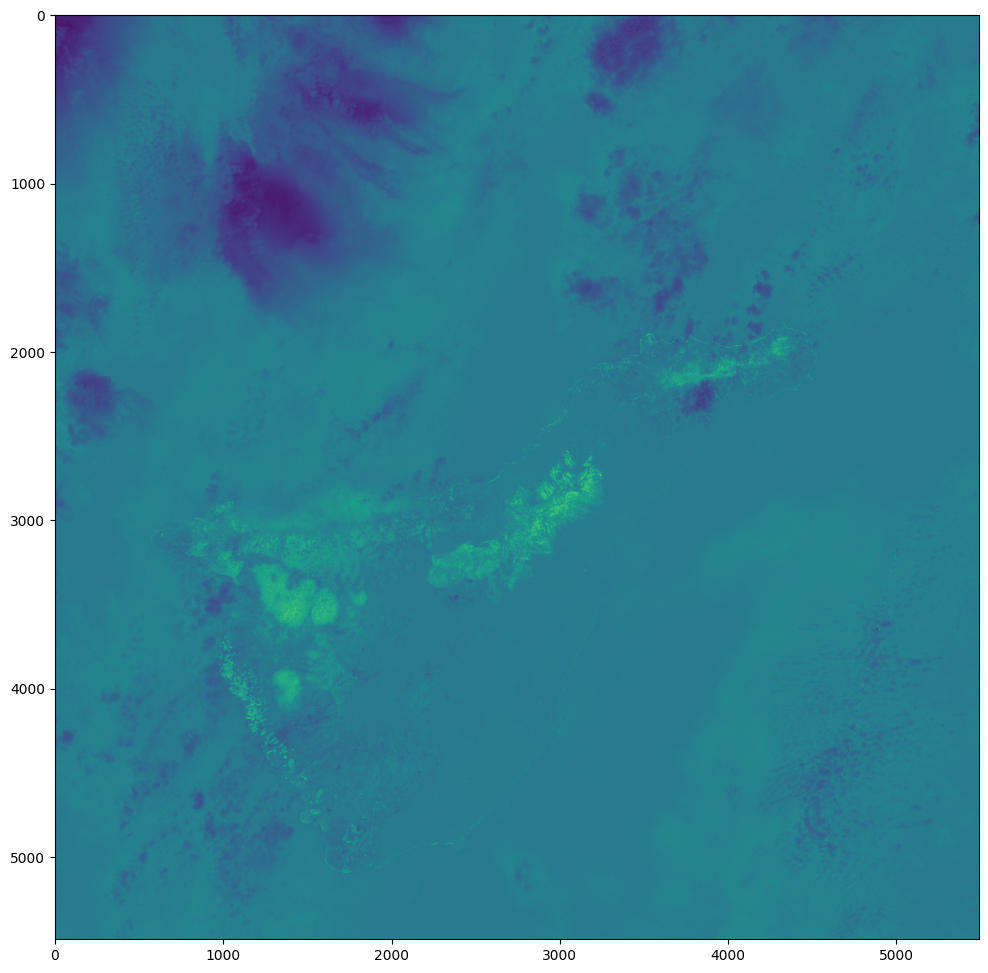

In [56]:
fig = plt.figure(figsize=(20,12))
show(image);

## <a id='s2_burnseverity_21'></a>5. Create the burn severity map

### Create water mask using Scene Classification Layer (20m resolution)

In [57]:
scl_image = rasterio.open('./SENTINEL_Images/T28RCS_20230813T115229_SCL_20m.jp2')

In [58]:
scl = scl_image.read()
scl = np.array(scl)
scl

array([[[6, 6, 6, ..., 6, 6, 6],
        [6, 6, 6, ..., 6, 6, 6],
        [6, 6, 6, ..., 6, 6, 6],
        ...,
        [6, 6, 6, ..., 6, 6, 6],
        [6, 6, 6, ..., 6, 6, 6],
        [6, 6, 6, ..., 6, 6, 6]]], dtype=uint8)

In [59]:
water = np.where(scl != 6, np.nan, scl)
water

array([[[6., 6., 6., ..., 6., 6., 6.],
        [6., 6., 6., ..., 6., 6., 6.],
        [6., 6., 6., ..., 6., 6., 6.],
        ...,
        [6., 6., 6., ..., 6., 6., 6.],
        [6., 6., 6., ..., 6., 6., 6.],
        [6., 6., 6., ..., 6., 6., 6.]]])

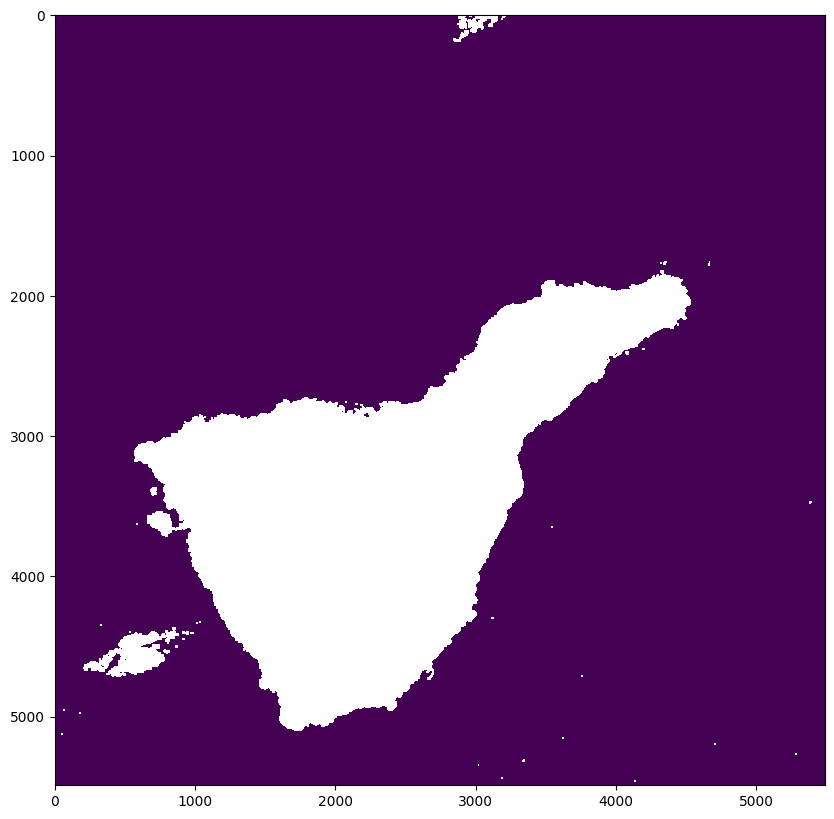

<Axes: >

In [60]:
fig = plt.figure(figsize=(10,10))
show(water)

In [61]:
meta = scl_image.meta
meta.update(driver='GTiff')
meta.update(dtype=rasterio.float32)

In [62]:
water_path = './SENTINEL_Images/2023-08-13_S2_water.tif'

with rasterio.open(water_path, 'w', **meta) as dest:
    dest.write(water.astype(rasterio.float32))